# Gold Prediction Model 
## Workflow:
1. Finding data set for gold's prices 
2. Preprocessing of the data 
3. Analyse the data to understand which factos are important and what is not
4. Spliting our data set into Training Set and Test Set 
5. Using Random Forest Regressor Model we will prefict the price
6. Evalutation of our model on the basis of the Test Set

Gold Prices Data Set : [Link](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa3FzTTUyZ2NzVVN4U3pWa0RBTVVxY0tLX05rZ3xBQ3Jtc0tteWtLTm5oQTVDd2lET21yeERTSlp2UFpIQWxFbm9USFYtLUpSZGh5YW9lOUlER242TGgtTDQ0M2hvWW9rZnl1V2tJamViV0I4X2NzVGRSbC1VVDFyUVRDT0dPb0FVMjBoOWhUd01haHAzRVUwb2wzRQ&q=https%3A%2F%2Fwww.kaggle.com%2Faltruistdelhite04%2Fgold-price-data&v=9ffkBvh8PTQ)


### Importing all the necessary libraries

In [114]:
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# As we are using two data sets one for testing and another for training we are using the train_test_split function
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor 
# It is used to find things like the error score, accuracy of model etc
from sklearn import metrics 
from sklearn.metrics import accuracy_score


### Collection of Data and Preprocessing

In [19]:
# Looding the csv fine using Pandas
gold_dataset = pd.read_csv(r"C:\Users\Yash Rajput\Desktop\Gold Price Prediction\Data Set\gld_price_data.csv") 
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Understanding the Data
1. Data: It is the date on which the values are noted in the format of MM/DD/YYYY
2. SPX: SPX indicates the S&P 500 index, it is the captilisation for top 500 companies in US (basically it is a stock)
3. GLD: It is the prices of gold on the corresponding dates
4. USO: It inidcates the United States Oil prices
5. SLV: It is the prices of silver on the corresponding dates
6. EUR/USD: It is the currency pair of euro and dollar

In [25]:
gold_dataset.tail()



,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [26]:
gold_dataset.shape

(2290, 6)

### Our Data Set Contains Dates from 2nd January 2008 to 16 May 2018
 Roughly we have a dataset of 10 years 
 
 2290 values to be precise

### Basic Information About the Data

In [27]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### We see that there aren't any null values

In [28]:
# We can also check the number of null values with this method
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Gathering Statistical Measures of the Data

In [29]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Analysing the data to find correlation
Identifying whether its a positive correlation or a negative correlation

understanding correlation in a very simple and crude way:

1. Positive Correlation: Directly Proportional
2. Negative Correlation: Inversely Proportional

In [33]:
correlation = gold_dataset.corr()

C:\Users\Yash Rajput\AppData\Local\Temp\ipykernel_26444\4191627151.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


### Constructing A Heat Map to understand the correlation


<Axes: >

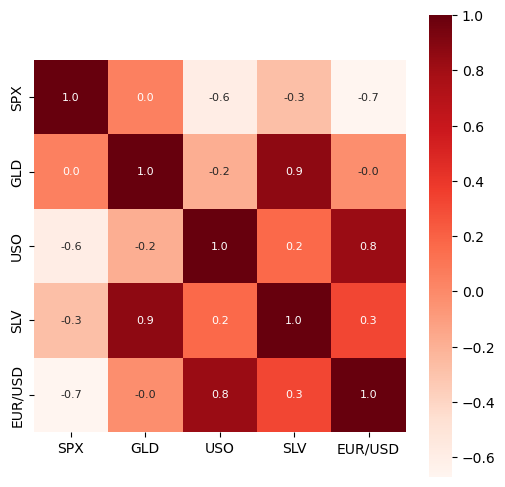

In [66]:
plt.figure(figsize = (6,6)) # Size of the heat map

sb.heatmap(correlation, square=True, cbar = True, fmt= '.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

### Understanding the parameters used above 
1. cbar = True: It shows the color bar on right which acts like a scale 
2. square = True: We wanted the map in square format, otherwise it would have been in rectangle format
3. fmt = '.1f': It it for the number of decimals we want 
4. annot = True: It is for the values we see on the small squares
5. cmap = 'Reds': It is for the color theme of the map

In [60]:
# Correlation values of Gold 
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Our Understanding
1. Gold and SP 500 are slightly positively correlated
2. Gold and US Oil is negatively correlated
3. Gold and Silver are positively correlated
4. Gold and currency pair is slightly negatively correlated

### Checking the distribution of the Gold's price over these 10 years

<Axes: xlabel='GLD', ylabel='Count'>

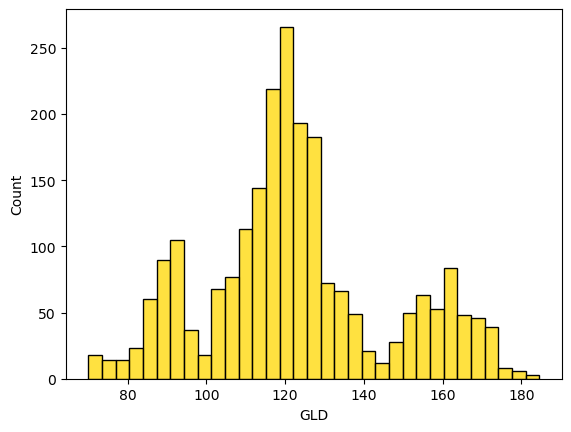

In [70]:
sb.histplot(gold_dataset['GLD'],color='Gold')
# Note: .distplot() was used in older versions, now we use .histplot()

### We can conlcude that majority of these values lie between 100 and 140

### Splitting Of The Data Set
We use the values of SPX, USO, SLV, EUR/USD to train our model to predict the price of GLD. In this process we will drop the date column

In [85]:
X = gold_dataset.drop(['GLD','Date'],axis=1) # For droping columns axis = 1 and for rows axis = 0
Y = gold_dataset['GLD']

In [86]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [87]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

### Splitting into Training Data and Test Data

In [88]:
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

### Understanding the parameters used above 
1. test_size = 0.2 : This means that 20% of the data available will be used for tesing
2. random_state = 2 : It tells us about the order of randomness used while sorting test set and training set

### Understanding Random Forest Algorithm
![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQjhzQiC8Xzjxs51ZJDmsAIuqoUUqjHNAhjdZ8zlIC5SqgRKh0mYw7GvxeiH8V0xOeT9d4&usqp=CAU)
[Explaination Video](https://youtu.be/WkFtIqWmX9o)

### Our Model: Random Forest Algorithm 

In [92]:
regressor = RandomForestRegressor(n_estimators=100) 
#is a hyperparameter that determines the number of decision trees to be used in the random forest ensemble.

### Training The Model

In [93]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation

In [94]:
test_data_prediction = regressor.predict(X_test)

In [95]:
test_data_prediction

array([168.59779942,  81.94749999, 115.97200043, 127.64660075,
       120.4747015 , 154.77799773, 150.2583978 , 126.01530059,
       117.391699  , 126.03410071, 116.64130072, 172.48760055,
       141.84029836, 167.8545987 , 115.11609997, 117.3707004 ,
       137.85520294, 169.85600043, 158.75230252, 159.45609943,
       155.05780021, 125.36950007, 175.96489984, 156.7293033 ,
       125.23580038,  93.79899992,  77.10950034, 120.6270002 ,
       119.10879939, 167.4877997 ,  88.39940066, 125.30700029,
        91.32460104, 117.54200064, 121.01279913, 136.62060095,
       115.36720137, 115.14500059, 147.94910002, 107.35880093,
       104.39280232,  87.27009791, 126.4887005 , 118.09130018,
       153.33169955, 119.76990013, 108.43290014, 108.08469806,
        93.11150013, 127.00449803,  74.64160048, 113.69479908,
       121.33710016, 111.26739879, 118.80469878, 120.62919929,
       159.92640113, 167.75630113, 146.76969697,  85.71479853,
        94.18380064,  86.68229887,  90.61720038, 119.05

### R Squared Error

In [96]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
error_score

0.9892294696357877

### Conclusion: As we have the values in range of 100s the error of 0.989 is low which means our model is performing well

### Visualising the error using graphs

In [109]:
# Y_test is data frame we need to convert it into list 
Y_test = list(Y_test)

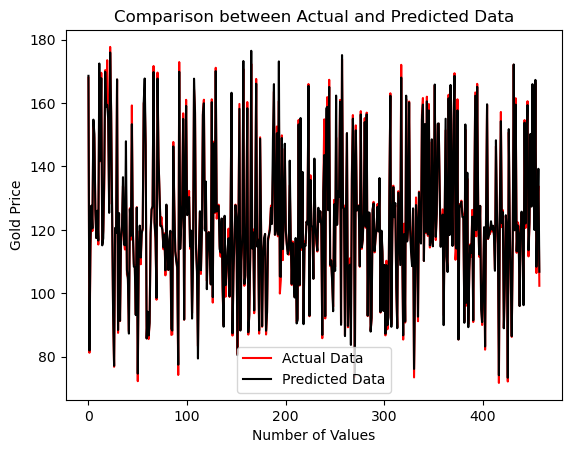

In [110]:
plt.plot(Y_test, color='red', label='Actual Data')
plt.plot(test_data_prediction, color='black', label='Predicted Data')
plt.title('Comparison between Actual and Predicted Data')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

### As we see the the Acutal Data and Predicted Data are almost overlapping

### Finding the Accuracy of our model

In [118]:
def mean_absolute_percentage_error(y_true, y_pred):
    total_error_percentage = 0.0
    for a, b in zip(y_true, y_pred):
        if a != 0:  # To handle cases where the true value is zero
            total_error_percentage += abs((a - b) / a)
    mean_error_percentage = (total_error_percentage / len(y_true)) * 100
    return mean_error_percentage

# Assuming you have list1 (actual values) and list2 (predicted values)
accuracy_percentage = 100 - mean_absolute_percentage_error(Y_test,test_data_prediction)

print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")


Accuracy Percentage: 98.92%


## Our Model is 98.92% Accurate

By Yash Rajput 


